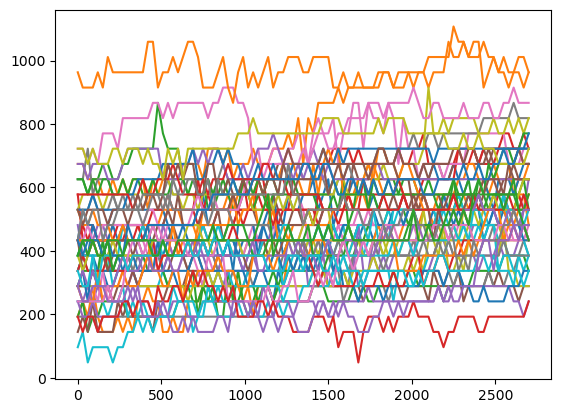

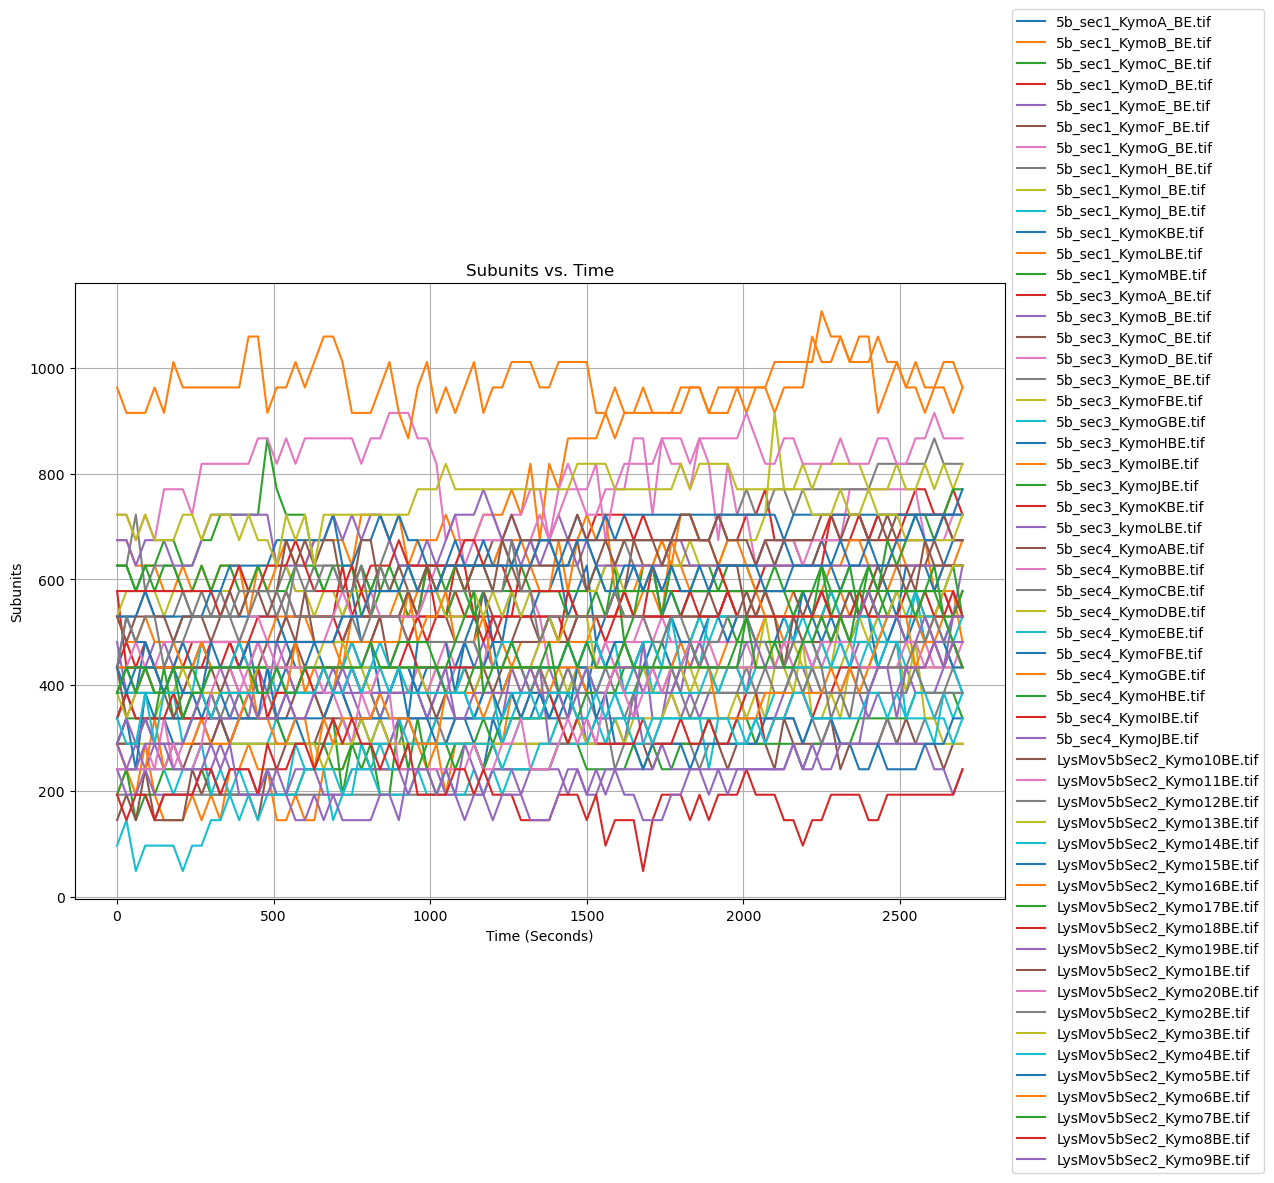

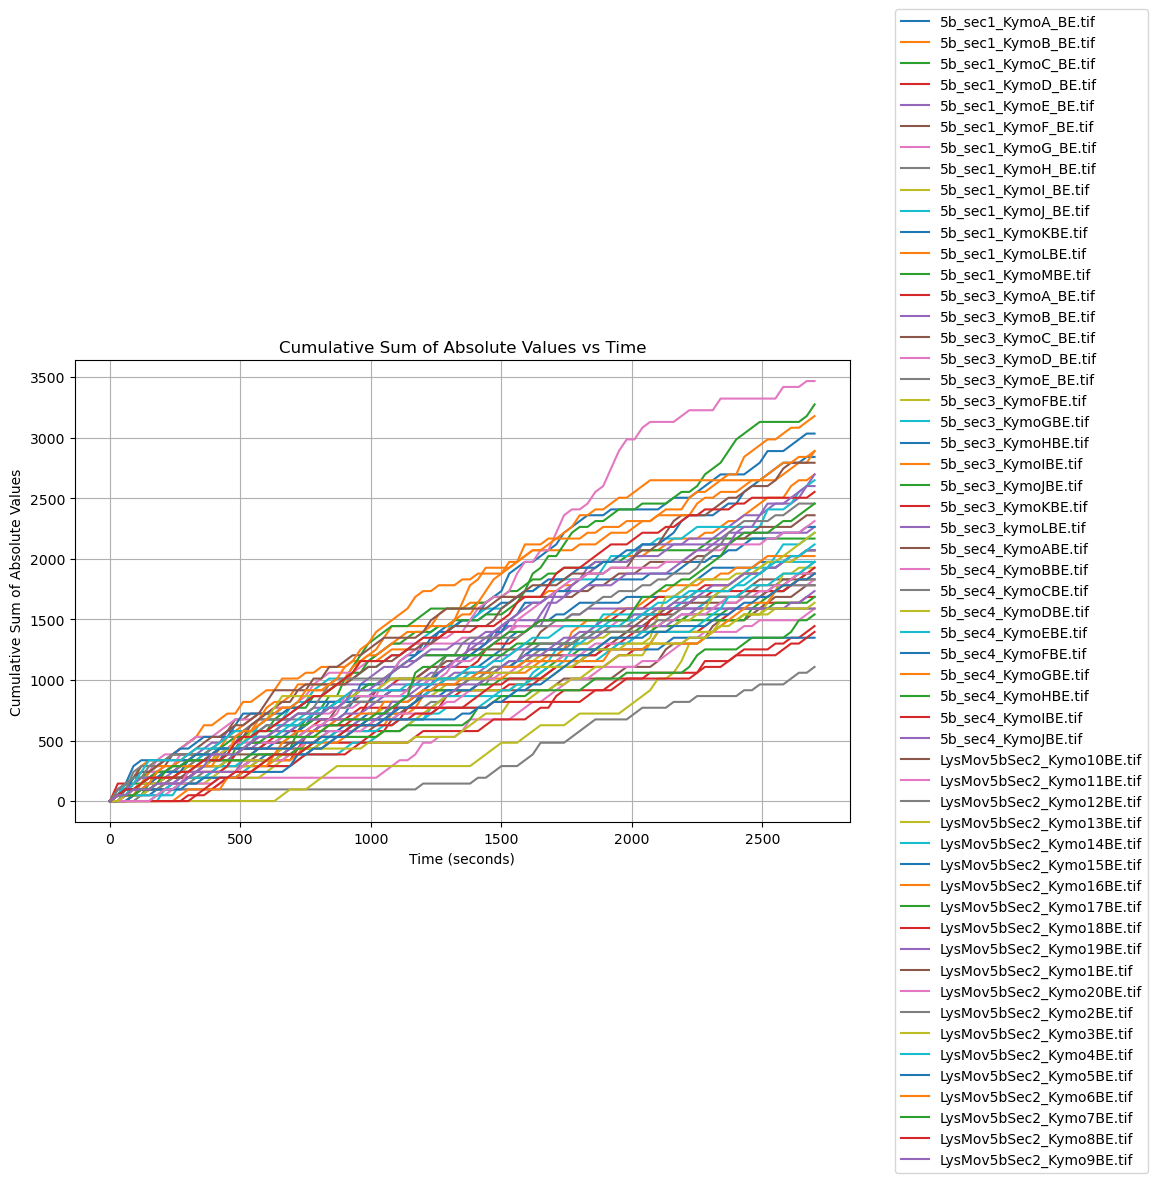

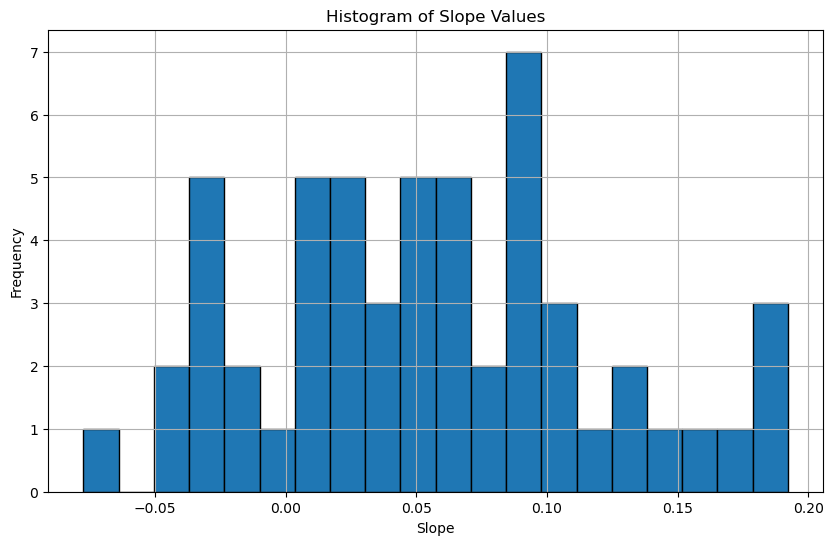

In [2]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from skimage.filters import threshold_li

# Specify the directory containing your TIFF files
directory = r'Path\to\your\data'

# Create an empty DataFrame to store the subunit data
data_df = pd.DataFrame()

# Create an empty list to store the filename, threshold, and slope data
slope_data = []

# List all files in the directory with a '.tif' extension
tif_files = [file for file in os.listdir(directory) if file.endswith('.tif')]

# Iterate over each TIFF file in the directory
for filename in tif_files:
    # Create the full path to the current TIFF file
    full_path = os.path.join(directory, filename)

    # Open the TIFF file
    im = Image.open(full_path)

    # Convert image to numpy array
    im_array = np.array(im)

    # Threshold value using threshold_li from skimage
    threshold = threshold_li(im_array)

    # Extract intensity values for each row
    intensity_values = []
    for row in range(im.height):
        row_data = im_array[row, :]
        white_pixels = np.sum(row_data >= threshold)
        intensity_values.append(white_pixels)

    # Convert intensity values to subunits
    subunits_values = [val * 48.148 for val in intensity_values]

    # Convert "Rows" into "seconds" by multiplying each row by time interval between frames
    time_seconds = [row * 30 for row in range(im.height)]

    # Add the subunit data to the DataFrame with the TIFF name as the index
    data_df[filename] = subunits_values

    # Plotting each TIFF file's subunit values
    plt.plot(time_seconds, subunits_values, label=filename)

    # Calculate the linear slope of each line
    slope = np.polyfit(time_seconds, subunits_values, 1)[0]

    # Append the filename, threshold, and slope to the slope_data list
    slope_data.append([filename, threshold, slope])

# Plotting each TIFF file's subunit values
plt.figure(figsize=(12, 8))  # Increase figure size to make the plot bigger
for filename in data_df.columns:
    plt.plot(time_seconds, data_df[filename], label=filename)

# Add plot labels and legend
plt.xlabel('Time (Seconds)')
plt.ylabel('Subunits')
plt.title('Subunits vs. Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move legend outside the plot area
plt.grid(True)

# Save the plot as a JPEG file
subunit_change_plot_filename = 'subunit_change_plot_LysLabel_BEKymo.jpeg'
plt.savefig(os.path.join(directory, subunit_change_plot_filename), format='jpeg')

plt.show()

# Create a DataFrame for the slope data and save it to an Excel file
slope_df = pd.DataFrame(slope_data, columns=['Filename', 'Threshold', 'Slope'])
slope_output_filename = 'slope_data_LysLabel_BEKymo.xlsx'
slope_df.to_excel(os.path.join(directory, slope_output_filename), index=False)

# Save the subunit data DataFrame to an Excel file
output_filename = 'subunit_data_LysLabel_BEKymo.xlsx'
data_df.to_excel(os.path.join(directory, output_filename))

# Create a DataFrame for relative changes
relative_change_df = pd.DataFrame()

# Calculate relative changes
for column in data_df.columns:
    relative_change = data_df[column].diff().fillna(0)
    relative_change_df[column] = relative_change

# Add time column to the DataFrame
relative_change_df['Time (Seconds)'] = time_seconds
relative_change_df = relative_change_df.set_index('Time (Seconds)')

# Save the relative change data to an Excel file
relative_change_output_filename = 'relative_change_data_LysLabel_BEKymo.xlsx'
relative_change_df.to_excel(os.path.join(directory, relative_change_output_filename))

# Load the existing slope data to update it
slope_df = pd.read_excel(os.path.join(directory, slope_output_filename))

# Save the updated slope data DataFrame to the Excel file
slope_df.to_excel(os.path.join(directory, slope_output_filename), index=False)

# Extract the 'Slope' column
slope_values = slope_df['Slope']

# Create a histogram of the slope values
plt.figure(figsize=(10, 6))
plt.hist(slope_values, bins=20, edgecolor='black')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.title('Histogram of Slope Values')
plt.grid(True)

# Save the histogram plot as a JPEG file
histogram_plot_filename = 'slope_histogram_plot_LysLabel_BEKymo.jpeg'
plt.savefig(os.path.join(directory, histogram_plot_filename), format='jpeg')

# Display the histogram plot
plt.show()